The Collimator Position Data was dropped from the study as we felt it didn't give much information on the quality of the beam injjection

In [1]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
data = pd.read_csv('../Data/TL_coll_inj_B1_formatted.txt',sep=' ', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1534472363,2.745,-5.325,1.205,-4.265,3.15,-2.69,10.0,-10.0,3.05,-0.91,2.295,-4.315,7.48,-5.72
1,1534472363,2.745,-5.325,1.205,-4.265,3.15,-2.69,10.0,-10.0,3.05,-0.91,2.295,-4.315,7.48,-5.72
2,1534475963,2.745,-5.325,1.205,-4.265,3.15,-2.69,10.0,-10.0,3.05,-0.91,2.295,-4.315,7.48,-5.72
3,1534475963,2.745,-5.325,1.205,-4.265,3.15,-2.69,10.0,-10.0,3.05,-0.91,2.295,-4.315,7.48,-5.72
4,1534475963,2.745,-5.325,1.205,-4.265,3.15,-2.69,10.0,-10.0,3.05,-0.91,2.295,-4.315,7.48,-5.72


Text(0.5,1,'MSE of Collimator Positions in the TL')

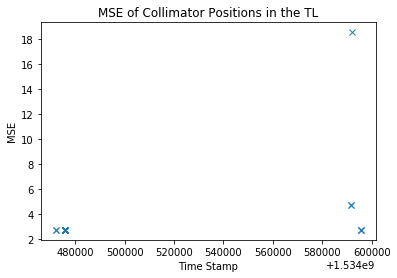

In [5]:
fig = plt.figure()
plt.plot(data[0][:50],data[1][:50],'x')
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Collimator Positions in the TL')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 15 columns):
0     1898 non-null int64
1     1898 non-null float64
2     1898 non-null float64
3     1898 non-null float64
4     1898 non-null float64
5     1898 non-null float64
6     1898 non-null float64
7     1898 non-null float64
8     1898 non-null float64
9     1898 non-null float64
10    1898 non-null float64
11    1898 non-null float64
12    1898 non-null float64
13    1898 non-null float64
14    1898 non-null float64
dtypes: float64(14), int64(1)
memory usage: 222.5 KB


If there's a change in the positions then the MSE > 0

In [6]:
def get_mse(row):
    regression_line = data.iloc[0]
    mse = []
    for i in range(1,len(row)):
        mse.append((regression_line[i]-row[i])**2)
    return np.mean(mse)

In [7]:
data['MSE'] = data.apply(lambda row: get_mse(row), axis=1)

In [8]:
data = data.rename(columns={0:'Time Stamp'})

Text(0.5,1,'MSE of Collimator Positions in the TL')

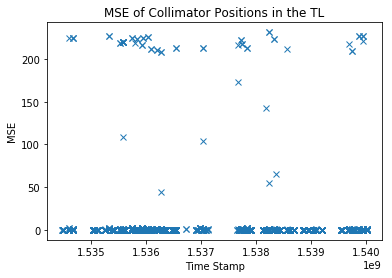

In [10]:
fig = plt.figure()
plt.plot(data['Time Stamp'],data['MSE'],'x')
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Collimator Positions in the TL')

As can be seen here, The collimators seem to move for certain injections, then they go back to place, is this due to anomalies, or due to testing?